In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
target = 'Depression'

In [3]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
print(f'Có {df_train.shape[0]} dòng và {df_train.shape[1]} cột.')

Có 140700 dòng và 20 cột.


In [5]:
df_train.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [6]:
print(f'Có {df_train.duplicated().sum()} dữ liệu trùng lặp.')

Có 0 dữ liệu trùng lặp.


# Trực quan hóa dữ liệu

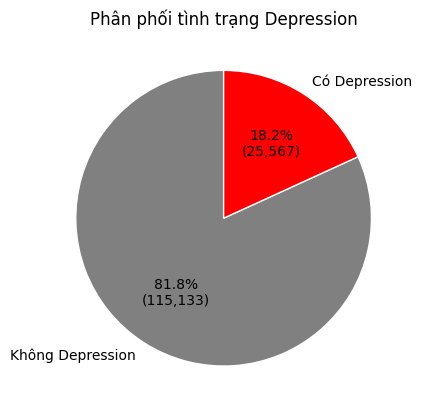

In [7]:
# Phân phối tình trạng Depression

depression_counts = df_train[target].value_counts()

# Tạo nhãn hiển thị số lượng + %
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}%\n({val:,})"
    return my_autopct

plt.pie(
    depression_counts,
    autopct=make_autopct(depression_counts),
    labels=['Không Depression', 'Có Depression'],
    startangle=90,
    colors=['gray', 'red'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title("Phân phối tình trạng Depression")
plt.show()

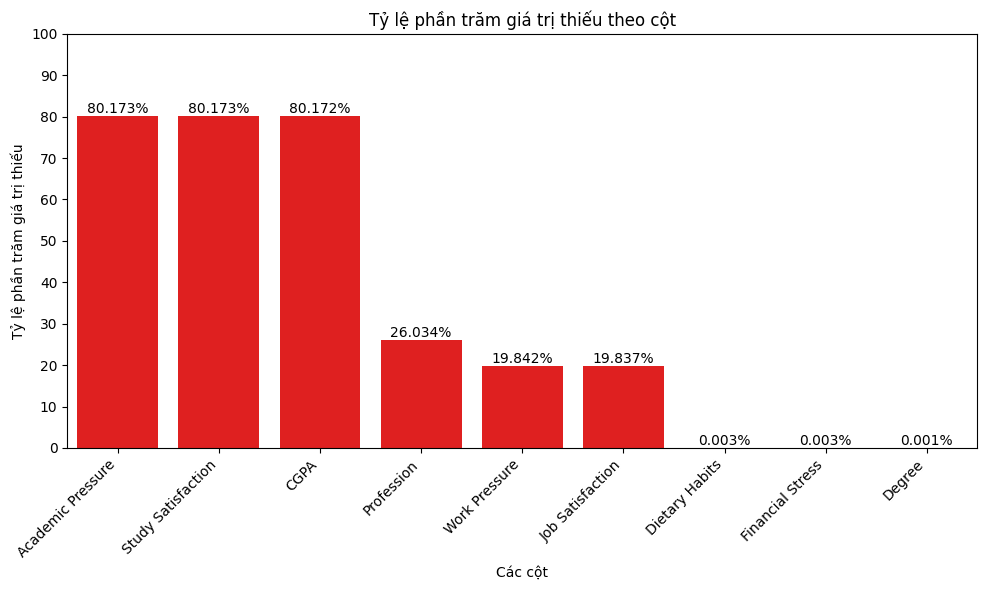

In [8]:
# Trực quan hóa dữ liệu thiếu
missing_values_percentage = np.round(df_train.isna().mean()*100, 3)
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values, color='red')
plt.title('Tỷ lệ phần trăm giá trị thiếu theo cột')
plt.xlabel('Các cột')
plt.ylabel('Tỷ lệ phần trăm giá trị thiếu')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45, ha='right')

# Thêm nhãn phần trăm
for i, v in enumerate(missing_values_percentage.values):
    ax.text(i, v, str(v) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Phân tích dữ liệu thiếu

- **Academic Pressure**, **Study Satisfaction**, và **CGPA** có ~80% giá trị thiếu. Các biến này chỉ áp dụng cho Student, không có ý nghĩa với Working Professional.
- **Profession**, **Work Pressure** và **Job Satisfaction** thiếu ~20–26%, tương ứng với nhóm Student không có các thuộc tính nghề nghiệp.

$\rarr$ **Giải pháp**: Tách dataset thành hai nhóm riêng biệt dựa trên biến **Working Professional or Student** thay vì điền giá trị thiếu.

## Tách dataset thành Working Professional và Student

In [9]:
df_train['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [10]:
# Tách dataset thành Working Professional và Student
df_working = df_train[df_train["Working Professional or Student"].str.strip() == 'Working Professional']
df_student = df_train[df_train["Working Professional or Student"].str.strip() == 'Student']

# Trực quan hóa Working Professional và Student

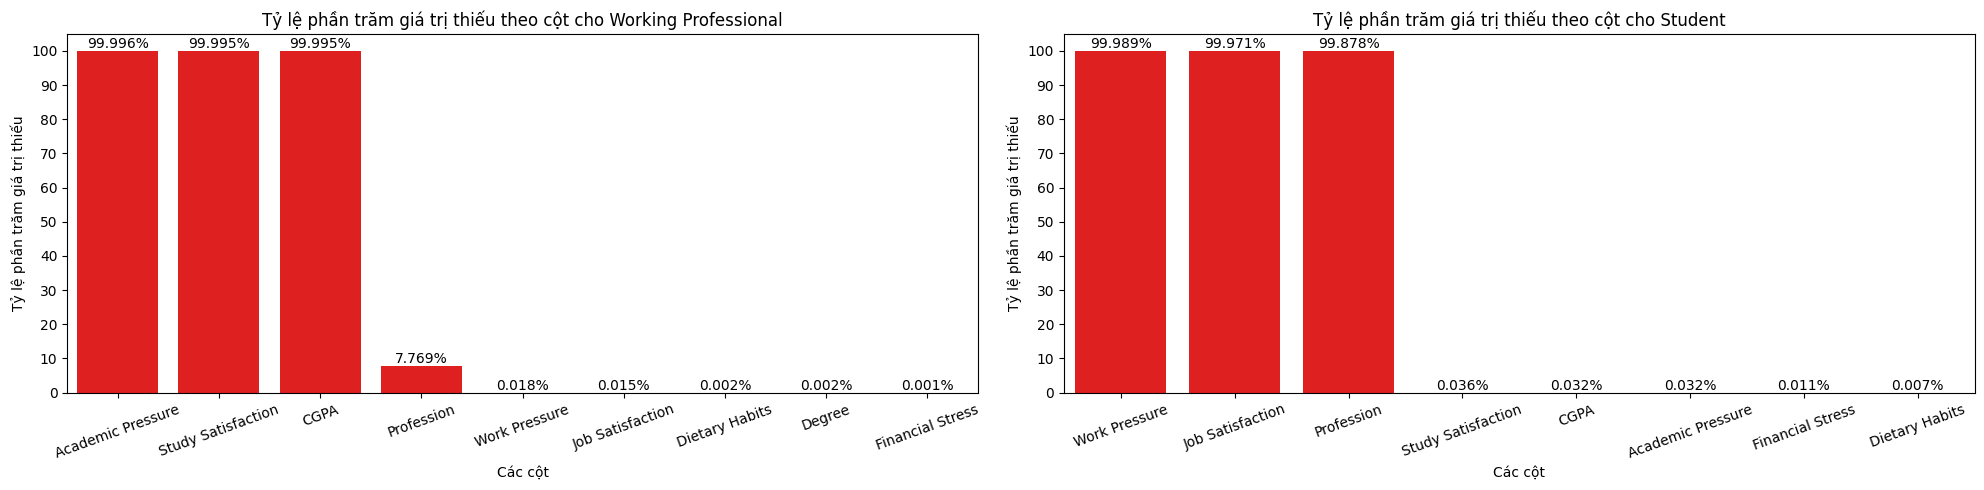

In [11]:
# Trực quan hóa dữ liệu thiếu cho từng nhóm
_, axes = plt.subplots(1, 2, figsize=(20, 5))

# Dữ liệu thiếu cho Working Professional
missing_percentage_working = np.round(df_working.isna().mean()*100, 3)
missing_percentage_working = missing_percentage_working[missing_percentage_working > 0].sort_values(ascending=False)

sns.barplot(x=missing_percentage_working.index, y=missing_percentage_working.values, color='red', ax=axes[0])
axes[0].set_title('Tỷ lệ phần trăm giá trị thiếu theo cột cho Working Professional')
axes[0].set_xlabel('Các cột')
axes[0].set_ylabel('Tỷ lệ phần trăm giá trị thiếu')
axes[0].set_yticks(np.arange(0, 101, 10))
axes[0].tick_params(axis='x', rotation=20)
# Thêm nhãn phần trăm
for i, v in enumerate(missing_percentage_working.values):
    axes[0].text(i, v, str(v) + '%', ha='center', va='bottom')


# Dữ liệu thiếu cho Student
missing_percentage_student = np.round(df_student.isna().mean()*100, 3)
missing_percentage_student = missing_percentage_student[missing_percentage_student > 0].sort_values(ascending=False)

sns.barplot(x=missing_percentage_student.index, y=missing_percentage_student.values, color='red', ax=axes[1])
axes[1].set_title('Tỷ lệ phần trăm giá trị thiếu theo cột cho Student')
axes[1].set_xlabel('Các cột')
axes[1].set_ylabel('Tỷ lệ phần trăm giá trị thiếu')
axes[1].set_yticks(np.arange(0, 101, 10))
axes[1].tick_params(axis='x', rotation=20)
# Thêm nhãn phần trăm
for i, v in enumerate(missing_percentage_student.values):
    axes[1].text(i, v, str(v) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
# Xóa các cột không liên quan đến từng nhóm
df_working = df_working.drop(['Academic Pressure', 'Study Satisfaction', 'CGPA'], axis=1)
df_student = df_student.drop(['Work Pressure', 'Job Satisfaction', 'Profession'], axis=1)

In [13]:
print(f'Số người trong nhóm Working Professional: {df_working.shape[0]}')
print(f'Số người trong nhóm Student: {df_student.shape[0]}')

Số người trong nhóm Working Professional: 112799
Số người trong nhóm Student: 27901


# Phân phối Depression

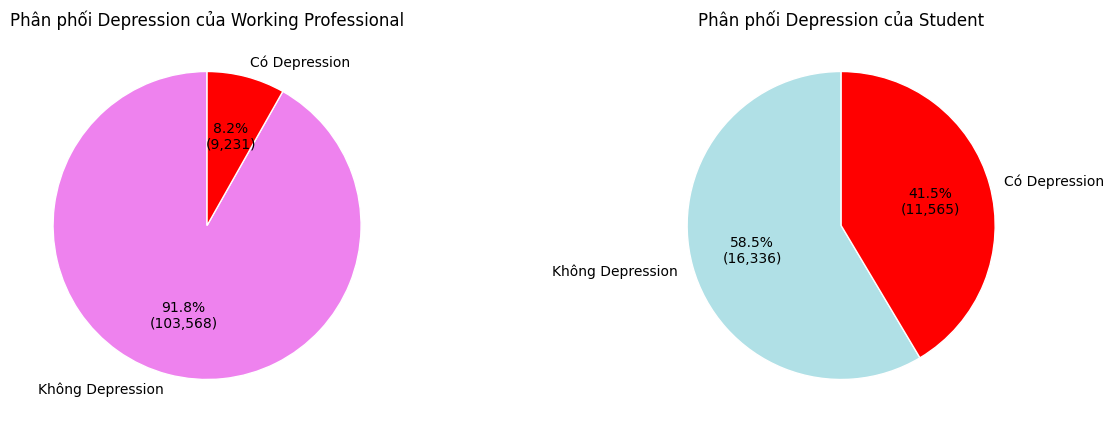

In [14]:
# Phân phối Depression cho Working Professional và Student
_, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hiển thị phần trăm và số lượng trên biểu đồ tròn
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}%\n({val:,})"
    return my_autopct


# Biểu đồ cho Working Professional
depression_count_working = df_working[target].value_counts()
axes[0].pie(
    depression_count_working,
    autopct=make_autopct(depression_count_working),
    labels=['Không Depression', 'Có Depression'],
    startangle=90,
    colors=['violet', 'red'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
axes[0].set_title("Phân phối Depression của Working Professional")


# Biểu đồ cho Student
depression_count_student = df_student[target].value_counts()
axes[1].pie(
    depression_count_student,
    autopct=make_autopct(depression_count_student),
    labels=['Không Depression', 'Có Depression'],
    startangle=90,
    colors=['powderblue', 'red'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
axes[1].set_title("Phân phối Depression của Student")

plt.show()

### Phân tích phân phối Depression

- Tổng quan: Nhóm Working Professional có số lượng người lớn hơn nhiều so với Student.
- **Tỷ lệ Depression**: Student cao hơn đáng kể, 41.5% so với 8.2% ở Working Professional.
- Phần lớn Working Professional duy trì mức độ sức khỏe tâm thần ổn định (>90% không có triệu chứng trầm cảm).

In [15]:
df_student['CGPA'].describe()

count    27892.000000
mean         7.658575
std          1.464499
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

## CGPA

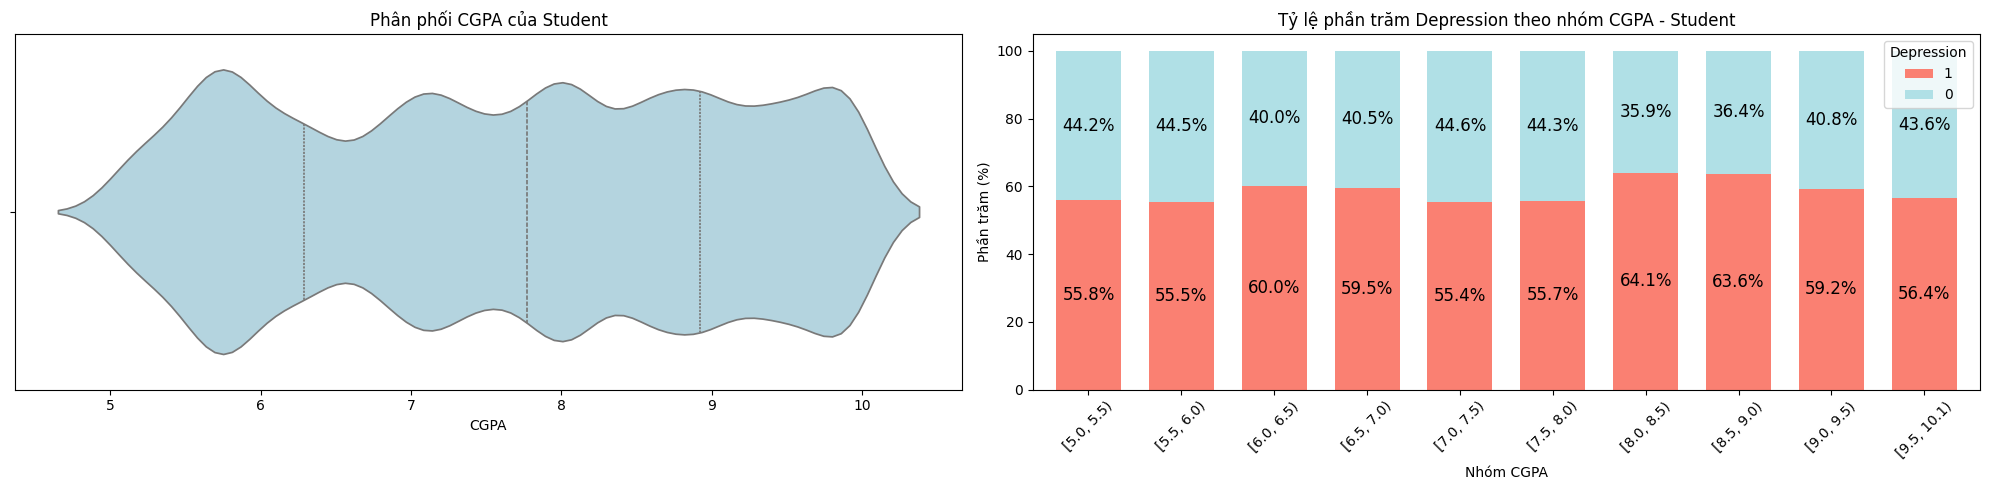

In [16]:
_, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(data=df_student, 
               x='CGPA',
               ax=axes[0],
               inner='quartile',
               color='lightblue',
)

axes[0].set_title('Phân phối CGPA của Student')

df_student['cgpaGroup'] = pd.cut(df_student['CGPA'], bins=[5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10.1], right=False)
cgpa_group = df_student.groupby('cgpaGroup', observed=True)[target].value_counts(normalize=True).unstack() * 100
# Đảo ngược thứ tự cột để Depression (1) ở dưới, No Depression (0) ở trên
cgpa_group = cgpa_group[[1, 0]]

bars = cgpa_group.plot(
    kind='bar',
    stacked=True,
    color=['salmon', 'powderblue'],
    width=0.7,
    ax=axes[1]
)
axes[1].set_title('Tỷ lệ phần trăm Depression theo nhóm CGPA - Student')
axes[1].set_ylabel('Phần trăm (%)')
axes[1].set_xlabel('Nhóm CGPA')
axes[1].tick_params(axis='x', rotation=45)
# Thêm nhãn phần trăm
for container in axes[1].containers:
    bar_labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
    axes[1].bar_label(container, labels=bar_labels, label_type='center', fontsize=12)

plt.tight_layout()
plt.show()

### Phân tích CGPA

**1. Đặc điểm phân phối**
- Có hình dạng lượn sóng với nhiều đỉnh nhỏ $\rarr$ thực lực học của Student phân bố khá đều.

**2. Mối quan hệ với Depression**
- Mức nền tỷ lệ trầm cảm rất cao: Ở bất kỳ mức điểm nào, tỷ lệ sinh viên mắc trầm cảm đều trên 55%.
- So sánh các nhóm:
    - CGPA 9.0-10.0: 56-59% trầm cảm
    - CGPA 5.0-6.0: 55-56% trầm cảm
    - CGPA 8.0-9.0: tỷ lệ cao nhất (~64%)

$\rarr$ CGPA không phải là yếu tố dự báo có ý nghĩa cho trầm cảm. Student thành tích cao và thấp có tỷ lệ trầm cảm tương đương nhau.

In [17]:
df_working['Age'].describe()

count    112799.000000
mean         43.991622
std          10.949170
min          18.000000
25%          38.000000
50%          46.000000
75%          53.000000
max          60.000000
Name: Age, dtype: float64

In [18]:
df_student['Age'].describe()

count    27901.000000
mean        25.822300
std          4.905687
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: Age, dtype: float64

# Age

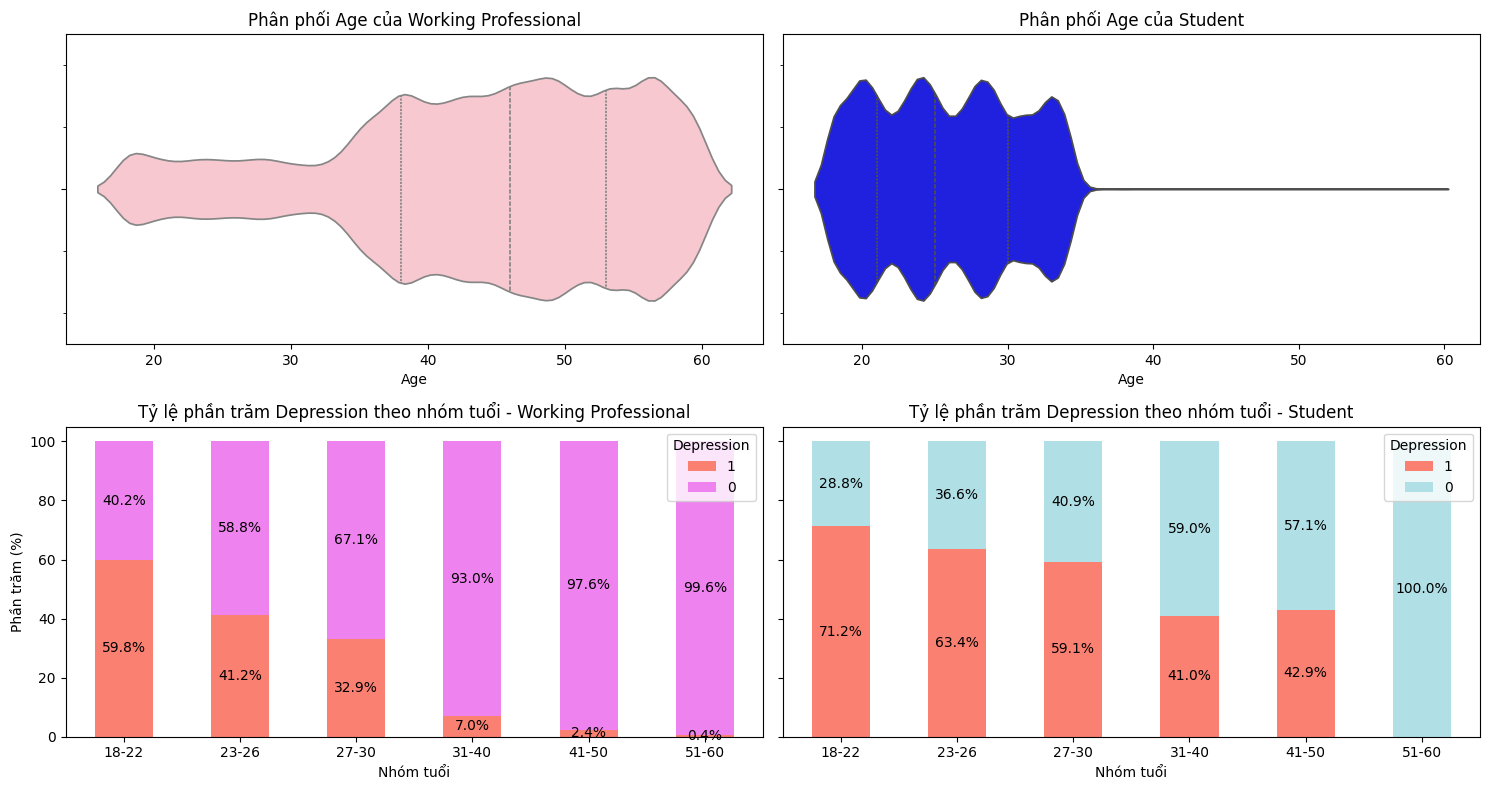

In [19]:
# Định nghĩa các khoảng tuổi và nhãn
bins = [18, 22, 26, 30, 40, 50, 60]
labels = ['18-22', '23-26', '27-30', '31-40', '41-50', '51-60']

fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharey='row')

for i, d in enumerate([df_working, df_student]):
    sns.violinplot(data=d, 
                   x='Age',
                   ax=axes[0][i],
                   gap=0.1,
                   inner='quartiles',
                   color='pink' if d is df_working else 'blue',
    )
    axes[0][i].set_title(f'Phân phối Age của {"Working Professional" if d is df_working else "Student"}')


    d['AgeGroup'] = pd.cut(d['Age'], bins=bins, labels=labels, right=False)
    age_group = d.groupby("AgeGroup", observed=True)[target].value_counts(normalize=True).unstack() * 100
    # Đảo ngược thứ tự cột để Depression (1) ở dưới, No Depression (0) ở trên
    age_group = age_group[[1, 0]]

    bars = age_group.plot(
        kind="bar",
        stacked=True,
        color=['salmon', 'violet' if d is df_working else 'powderblue'],
        ax=axes[1][i]
    )
    axes[1][i].set_title(f"Tỷ lệ phần trăm Depression theo nhóm tuổi - {'Working Professional' if d is df_working else 'Student'}")
    axes[1][i].set_ylabel("Phần trăm (%)" if d is df_working else "")
    axes[1][i].set_xlabel("Nhóm tuổi")
    axes[1][i].tick_params(axis='x', rotation=0)
    # Thêm nhãn phần trăm
    for container in axes[1][i].containers:
        bar_labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
        axes[1][i].bar_label(container, labels=bar_labels, label_type='center')

plt.tight_layout()
plt.show()

### Phân tích Age

**1. Working Professional**
- **Phân phối**: 
    - Đa số trong độ tuổi 40-55.
    - Biểu đồ phình to ở đoạn giữa và cuối, cho thấy đa số người đi làm trong dữ liệu này là những người đã có kinh nghiệm hoặc lớn tuổi. Nhóm trẻ hơn (dưới 32) chiếm tỷ trọng nhỏ hơn.
- **Xu hướng trầm cảm**:
    - Nhóm 18-30 tuổi: Có phân bổ thấp nhất nhưng tỷ lệ trầm cảm cao nhất, đạt đỉnh ~60% ở nhóm trẻ nhất.
    - Giảm mạnh theo tuổi: gần như 0% sau 40 tuổi.

**2. Student**
- **Phân phối**: 
    - Tập trung ở 20-28 tuổi.
    - Biểu đồ phình to nhất ở đoạn đầu và thắt lại rất nhanh sau tuổi 30. Có đuôi dài kéo đến 60 tuổi, nhưng rất mỏng, cho thấy sinh viên lớn tuổi là rất hiếm.
- **Xu hướng trầm cảm**:
    - Phổ biến ở nhóm trẻ, cao nhất 71.2% trong độ tuổi 18-22.
    - Giảm dần nhưng vẫn cao hơn Working Professional cùng độ tuổi.
    - Nhóm 51-60 tuổi: 100% không trầm cảm, nhưng do số lượng mẫu ở độ tuổi này quá ít, con số này có thể không mang ý nghĩa thống kê lớn.

**3. So sánh**
- Student có tỷ lệ trầm cảm cao hơn ở nhóm tuổi 18 $\rarr$ 50.
- Việc làm có mối liên hệ với sức khỏe tâm lý tốt hơn sau độ tuổi trưởng thành.
- **Nhóm dễ bị trầm cảm nhất**: 18-26 tuổi trong cả hai nhóm.

$\rarr$ Ở nhóm Working Professional, việc già đi giúp giảm thiểu trầm cảm đáng kể (giảm xuống dưới 10% sau tuổi 30). Với nhóm Student, việc lớn tuổi hơn không giúp ích nhiều, một sinh viên 40 tuổi vẫn có tỷ lệ trầm cảm cao (~41%)

## Work/Study Hours

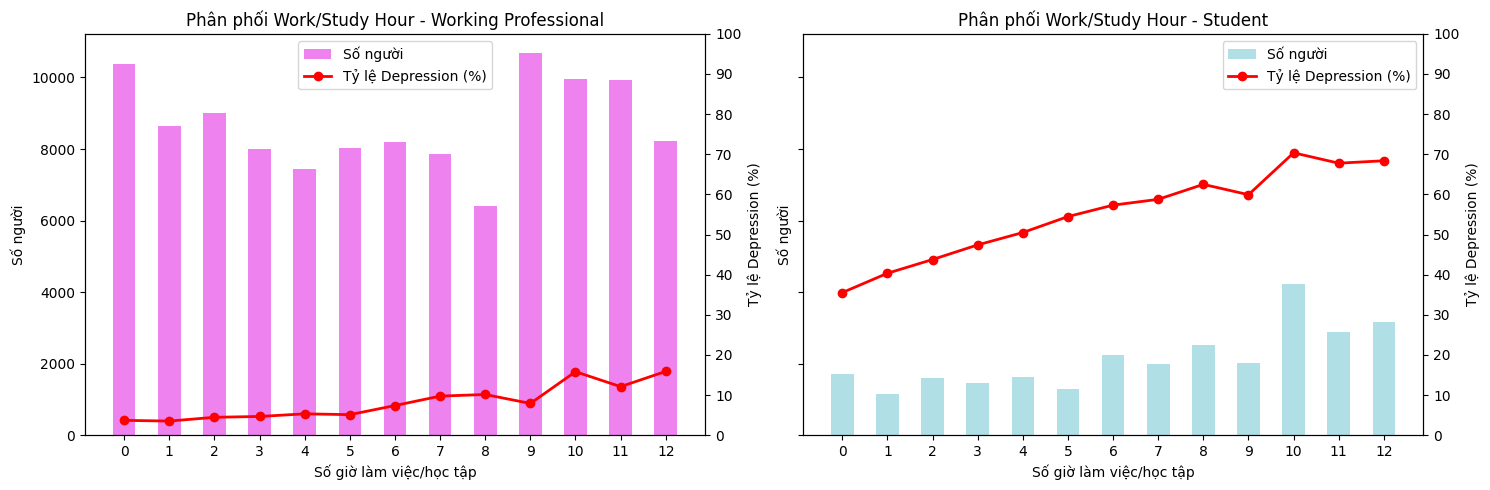

In [20]:
# Số giờ làm việc/học tập - Phân phối tỷ lệ Depression
_, ax1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

for i, d in enumerate([df_working, df_student]):
    # Tính số lượng và tỷ lệ depression
    stats = (
        d.groupby('Work/Study Hours')[target]
        .agg(['count', 'mean'])
        .reset_index()
        .sort_values('Work/Study Hours')
    )
    stats[target] = stats['mean'] * 100

    # Biểu đồ cột - phân phối số giờ làm việc/học tập
    ax1[i].bar(
        stats['Work/Study Hours'],
        stats['count'],
        width=0.5,
        color='violet' if d is df_working else 'powderblue',
        align='center',
        label='Số người'
    )
    ax1[i].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    ax1[i].set_ylabel('Số người')
    ax1[i].set_xlabel('Số giờ làm việc/học tập')
    ax1[i].set_title('Phân phối Work/Study Hour - ' + ('Working Professional' if d is df_working else 'Student'))

    # Biểu đồ đường - tỷ lệ depression
    ax2 = ax1[i].twinx()
    ax2.plot(
        stats['Work/Study Hours'],
        stats[target],
        color='red',
        marker='o',
        linewidth=2,
        label='Tỷ lệ Depression (%)'
    )
    ax2.set_ylabel('Tỷ lệ Depression (%)')

    # Đặt yticks từ 0 đến 100
    ax2.set_ylim(0, 100)
    ax2.set_yticks(np.arange(0, 101, 10))

    # Kết hợp chú thích
    lines, labels = ax1[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1[i].legend(lines + lines2, labels + labels2)

plt.tight_layout()
plt.show()

### Phân tích Work/Study Hours

**1. Working Professional**
- Phân phối:
    - Phân bổ khá đều ở các mốc giờ, nhưng tập trung đông đảo ở mức cường độ cao (9-11 giờ). Nhóm làm việc 0 giờ cũng chiếm số lượng lớn.
- Xu hướng trầm cảm:
    - Thấp và ổn định: dưới 10% từ 0-9 giờ.
    - Chỉ khi làm việc từ 10-12 giờ, tỷ lệ trầm cảm mới tăng nhẹ (~15-18%).

**2. Student**
- Phân phối:
    - Số lượng sinh viên phân bổ rải rác, nhưng có xu hướng tăng dần ở các mốc thời gian cao.
- Xu hướng trầm cảm:
    - Vì có tỷ lệ nền cao, nhóm 0 giờ có tỷ lệ trầm cảm thấp nhất vẫn đạt gần 40%.
    - Nhóm 10 giờ: Có phân bổ lớn nhất và tỷ lệ trầm cảm cao nhất (~70%), cao hơn **gấp ~3.5 lần** Working Professional cùng số giờ.

**3. So sánh**
- Student có tỷ lệ trầm cảm cao hơn ở **mọi mức số giờ**.
- Working Professional và Student có chung xu hướng: **Số giờ làm việc/học tập tăng $\rarr$ Tỷ lệ trầm
cảm tăng**. Tuy nhiên, cả hai nhóm đều có tỷ lệ trầm cảm giảm tại 9 giờ và 11 giờ.
- Biên độ thay đổi: Student dao động cao hơn 40-70%, Working Professional chỉ 3-20%.

$\rarr$ Số giờ làm việc/học tập tăng có xu hướng dẫn đến tỷ lệ trầm cảm tăng. Tỷ lệ Depression của
Student tăng mạnh hơn so với Working Professional.

## Gender, Suicidal Thoughts & Family History of Mental Illness

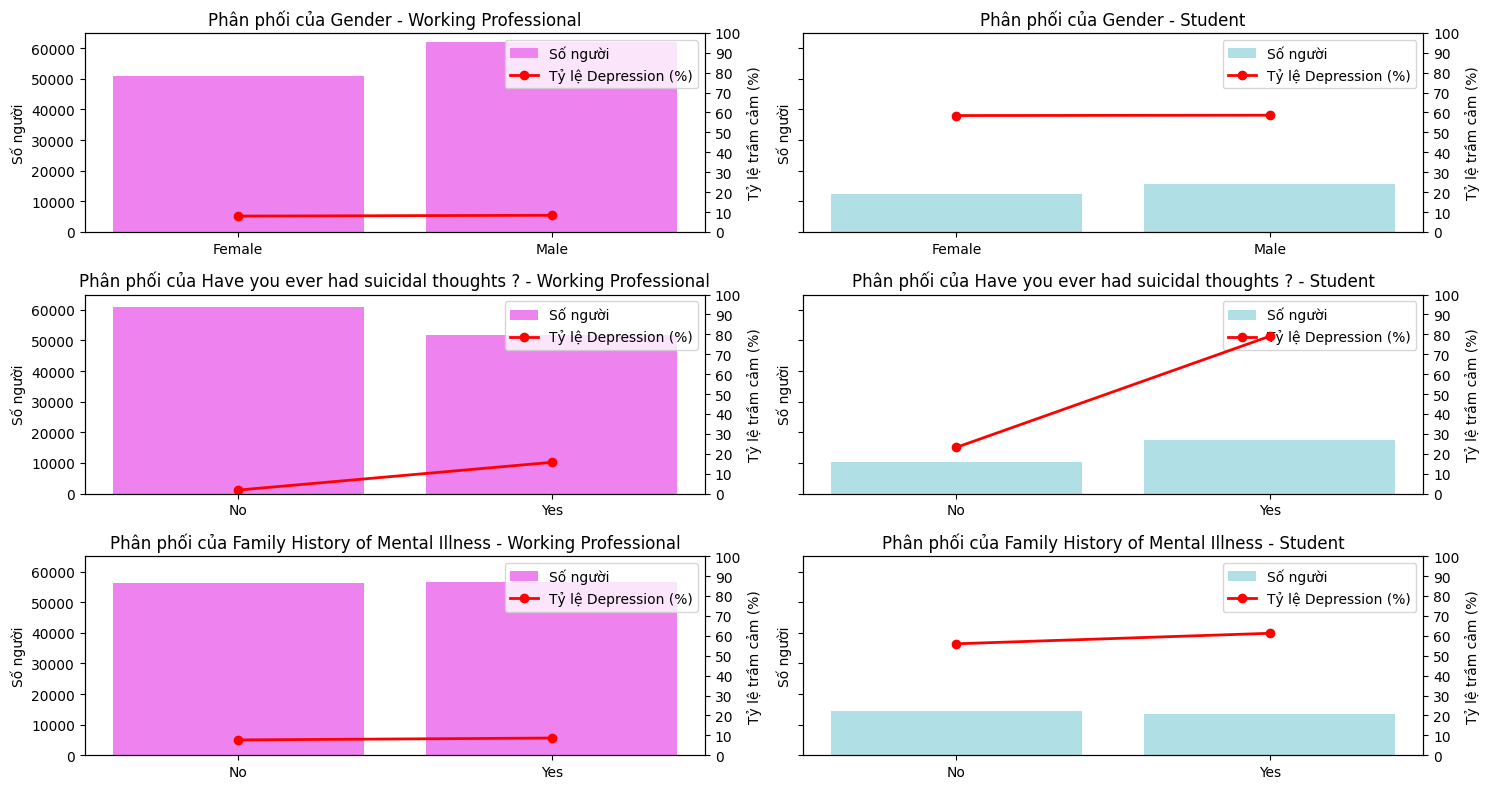

In [21]:
# Phân phối các biến phân loại và tỷ lệ Depression
fig, axes = plt.subplots(3, 2, figsize=(15, 8), sharey=True)
categorical_cols_for_plot = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for i, col in enumerate(categorical_cols_for_plot):
    for j, d in enumerate([df_working, df_student]):
        if col == 'Work Pressure' and d is df_student: col = 'Academic Pressure'
        if col == 'Job Satisfaction' and d is df_student: col = 'Study Satisfaction'

        stats = (
            d.groupby(col)[target]
            .agg(['count', 'mean'])
            .reset_index()
            .sort_values(col)
        )
        stats[target] = stats['mean'] * 100

        axes[i][j].bar(
                    stats[col],
                    stats['count'],
                    color='violet' if d is df_working else 'powderblue',
                    align='center',
                    label='Số người'
        )
        axes[i][j].set_title(f'Phân phối của {col} - ' + ('Working Professional' if d is df_working else 'Student'))
        axes[i][j].set_ylabel('Số người')
        axes[i][j].tick_params(axis='x', rotation=0)


        ax2 = axes[i][j].twinx()
        ax2.plot(
            stats[col],
            stats[target],
            color='red',
            marker='o',
            linewidth=2,
            label='Tỷ lệ Depression (%)'
        )
        ax2.set_ylabel('Tỷ lệ trầm cảm (%)')

        # Đặt yticks từ 0 đến 100
        ax2.set_ylim(0, 100)
        ax2.set_yticks(np.arange(0, 101, 10))

        # Kết hợp chú thích
        lines, labels = axes[i][j].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        axes[i][j].legend(lines + lines2, labels + labels2, loc='upper right')


plt.tight_layout()
plt.show()

### Phân tích Gender, Suicidal Thoughts, Family History of Mental Illness

**1. Working Professional**
- **Gender**: "Male" chiếm số lượng nhiều hơn, tỷ lệ trầm cảm thấp và tương đương ở cả hai giới.
- **Suicidal Thoughts**:
  - Nhóm "No": Có số lượng cao hơn, tỷ lệ thấp (~5%).
  - Nhóm "Yes": Tỷ lệ trầm cảm cao hơn đáng kể (~20%).
  - Đáng chú ý: Nhiều người trả lời "Yes" nhưng chỉ ~20% được phân loại có trầm cảm.
- **Family History of Mental Illness**: Tỷ lệ trầm cảm thấp, phân bổ và tỷ lệ trầm cảm không có khác biệt nhiều ở cả "No" và "Yes".

**2. Student**
- **Gender**: "Male" đông hơn, cả hai giới đều có tỷ lệ trầm cảm rất cao (~60%), không phân biệt rõ ràng.
- **Suicidal Thoughts**: 
  - Nhóm "Yes": Có phân bổ đông hơn và tỷ lệ trầm cảm cao (~80%) - **yếu tố phân biệt mạnh nhất**.
  - Nhóm "No": Tỷ lệ vẫn cao (~25%) do tỷ lệ nền chung cao.
- **Family History**: Tỷ lệ trầm cảm của cả hai nhóm đều cao, nhóm "Yes" cao hơn một chút (~62% vs ~57%).

**3. So sánh**
- **Gender** và **Family History**: Có phân bổ tương tự nhau và đều không phải yếu tố phân biệt mạnh ở cả hai nhóm.
- Student có tỷ lệ trầm cảm cao hơn ở **mọi phân nhóm** - ngay cả nhóm tỷ lệ thấp của Student vẫn vượt nhóm tỷ lệ cao của Working Professional.

$\rarr$ **Suicidal Thoughts** là chỉ số quan trọng nhất với cả hai nhóm, đặc biệt Student có tỷ lệ trầm
cảm cao hơn nhiều so với Working Professional (80% vs 20%).

## Financial Stress, Work/Academic Pressure & Job/Study Satisfaction

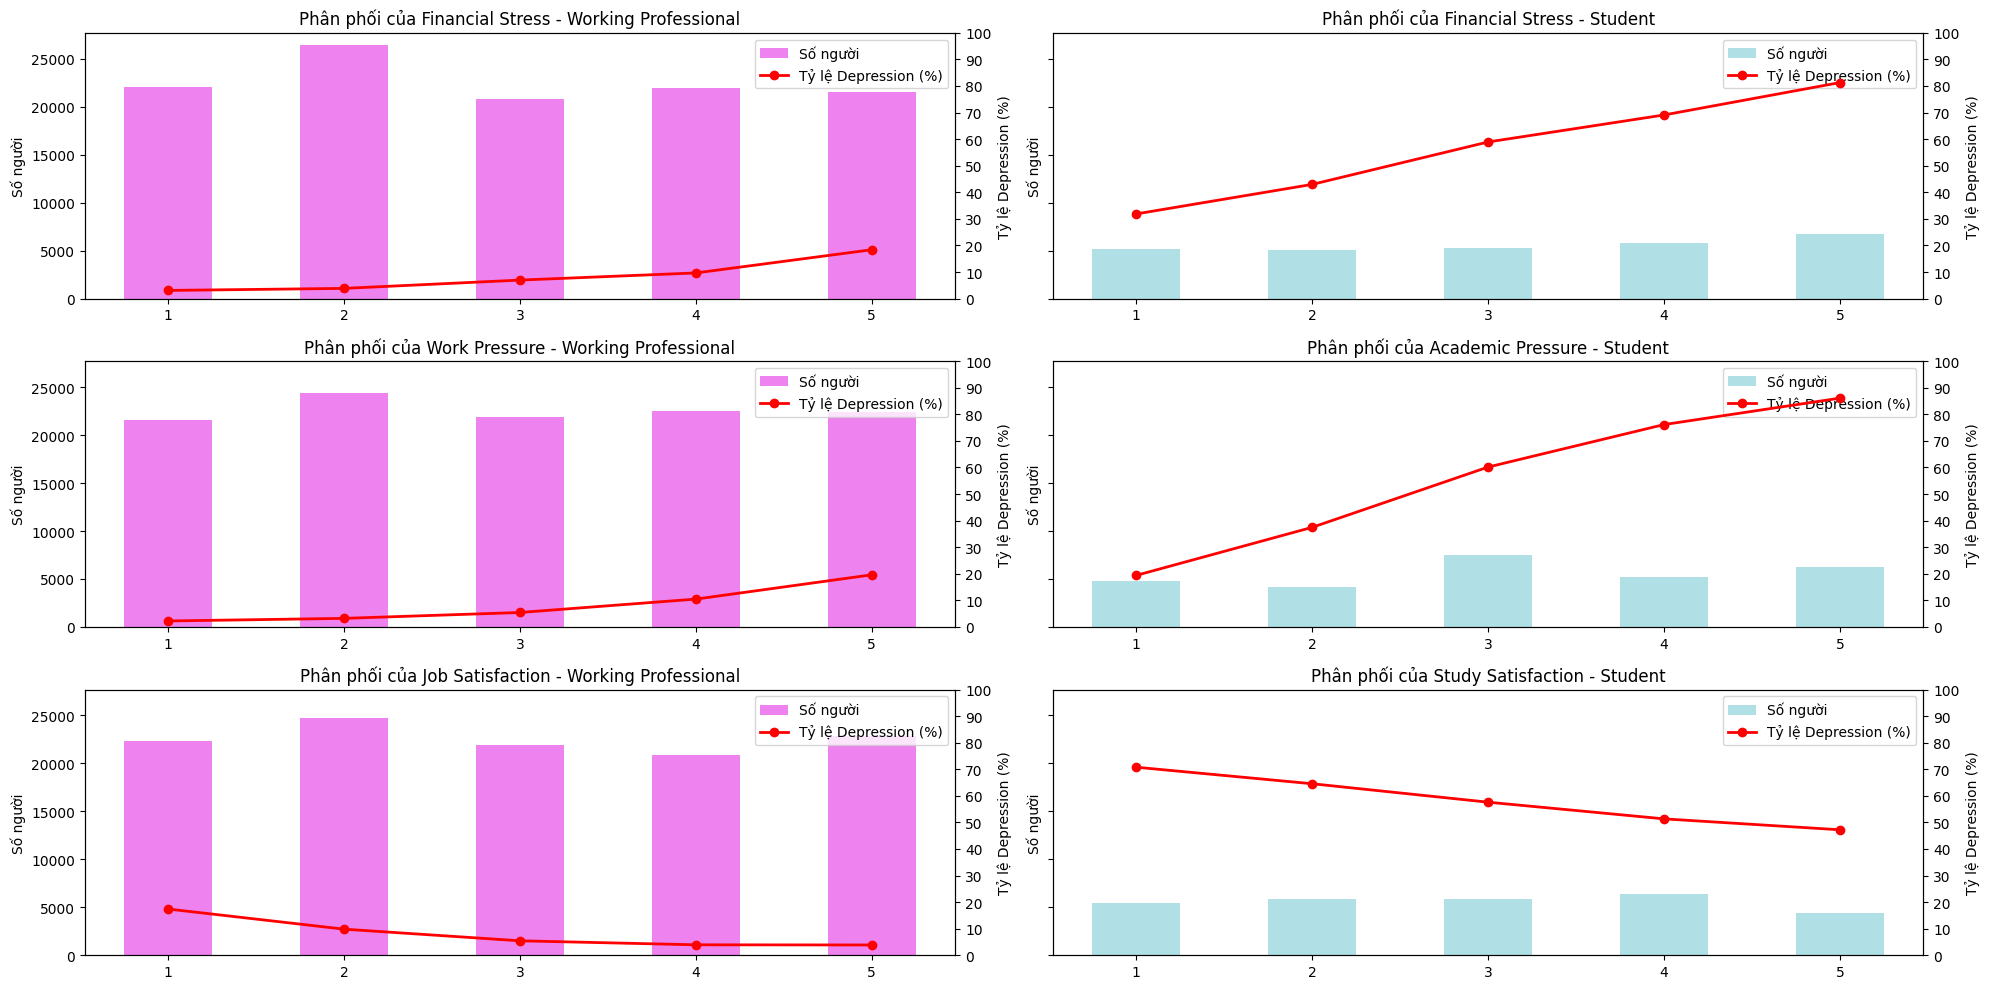

In [22]:
# Distribution of stress, pressure, and satisfaction variables for working professional and student
fig, axes = plt.subplots(3, 2, figsize=(20, 10), sharey=True)
categorical_cols_for_plot = ['Financial Stress', 'Work Pressure', 'Job Satisfaction']

for i, col in enumerate(categorical_cols_for_plot):
    for j, d in enumerate([df_working, df_student]):
        if col == 'Work Pressure' and d is df_student: col = 'Academic Pressure'
        if col == 'Job Satisfaction' and d is df_student: col = 'Study Satisfaction'

        stats = (
            d.groupby(col)[target]
            .agg(['count', 'mean'])
            .reset_index()
            .sort_values(col)
        )
        stats[target] = stats['mean'] * 100

        axes[i][j].bar(
                    stats[col],
                    stats['count'],
                    width=0.5,
                    color='violet' if d is df_working else 'powderblue',
                    align='center',
                    label='Số người'
        )
        axes[i][j].set_title(f'Phân phối của {col} - ' + ('Working Professional' if d is df_working else 'Student'))
        axes[i][j].set_ylabel('Số người')
        axes[i][j].tick_params(axis='x', rotation=0)


        ax2 = axes[i][j].twinx()
        ax2.plot(
            stats[col],
            stats[target],
            color='red',
            marker='o',
            linewidth=2,
            label='Tỷ lệ Depression (%)'
        )
        ax2.set_ylabel('Tỷ lệ Depression (%)')

        # Đặt yticks từ 0 đến 100
        ax2.set_ylim(0, 100)
        ax2.set_yticks(np.arange(0, 101, 10))

        # Kết hợp chú thích
        lines, labels = axes[i][j].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        axes[i][j].legend(lines + lines2, labels + labels2, loc='upper right')


plt.tight_layout()
plt.show()

### Phân tích Financial Stress, Work/Academic Pressure, Job/Study Satisfaction

**1. Working Professional**
- **Financial Stress**: Tương quan dương - mức căng thẳng cao hơn gắn với tỷ lệ trầm cảm cao hơn.
- **Work Pressure**: Tỷ lệ trầm cảm tăng theo mức áp lực công việc.
- **Job Satisfaction**: Tương quan nghịch - mức độ hài lòng cao giúp giảm nguy cơ trầm cảm.

**2. Student**
- **Financial Stress**: Tỷ lệ trầm cảm có xu hướng tăng mạnh, cao nhất đến hơn 80% - tác động lớn hơn so với Working Professional.
- **Academic Pressure**: Tỷ lệ trầm cảm tăng rõ nét, mức áp lực cao đẩy tỷ lệ trầm cảm lên đáng kể. Tỷ lệ trầm cảm cao nhất lên đến gần 90%.
- **Study Satisfaction**: Độ hài lòng cao có giảm trầm cảm nhưng tỷ lệ nền vẫn cao ở mọi mức.

**3. So sánh**
- Dữ liệu phân phối khá đồng đều ở các mức độ stress/pressure/satisfaction khác nhau.
- Student có tỷ lệ trầm cảm cao hơn ở **mọi mức độ** stress/pressure/satisfaction.
- Độ dốc ảnh hưởng: Student nhạy cảm hơn - thay đổi mức áp lực và tài chính tạo biên độ dao động lớn hơn.
- Working Professional thay đổi nhẹ hơn nhưng vẫn chịu tác động rõ từ Work Pressure và Financial Stress.

$\rarr$ Mọi yếu tố stress/pressure đều tác động đến tỷ lệ trầm cảm mạnh hơn lên Student so với Working
Professional.

In [23]:
df_train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

In [24]:
df_test['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours                      25661
7-8 hours                              24491
More than 8 hours                      22190
5-6 hours                              21404
6-7 hours                                  7
8-9 hours                                  6
4-5 hours                                  6
2-3 hours                                  4
3-4 hours                                  3
9-5                                        2
9-5 hours                                  2
1-2 hours                                  2
4-6 hours                                  2
Meerut                                     2
1-6 hours                                  2
Unhealthy                                  1
Vivan                                      1
60-65 hours                                1
0                                          1
8-89 hours                                 1
Have_you_ever_had_suicidal_thoughts        1
than 5 hours                            

In [25]:
df_train['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64

In [26]:
df_test['Dietary Habits'].value_counts()

Dietary Habits
Moderate        33018
Unhealthy       30786
Healthy         29966
No                  6
More Healthy        2
Indoor              1
Prachi              1
Male                1
Less Healthy        1
Mealy               1
Resistant           1
MCA                 1
5 Healthy           1
Academic            1
Educational         1
Soham               1
5 Unhealthy         1
Vivaan              1
Raghav              1
1.0                 1
Naina               1
Kolkata             1
Name: count, dtype: int64

In [27]:
# Map giá trị của các biến phân loại thành giá trị số

gender={
    'Male':1,
    'Female':0,
}

work={
    'Working Professional':1,
    'Student':0,
}

suicidal_thought={
    'Yes':1,
    'No':0,
}

family_history={
    'Yes':1,
    'No':0,
}

sleep={
    'Less than 5 hours':4,
    '7-8 hours':7.5,
    'More than 8 hours':9, 
    '5-6 hours':5.5,
}

diet={
    'Healthy':2,
    'Moderate':1,
    'Unhealthy':0,   
}

df_working['Gender'] = df_working['Gender'].map(gender)
df_working['Have you ever had suicidal thoughts ?'] = df_working['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
df_working['Family History of Mental Illness'] = df_working['Family History of Mental Illness'].map(family_history)
df_working['Sleep Duration'] = df_working['Sleep Duration'].map(sleep)
df_working['Dietary Habits'] = df_working['Dietary Habits'].map(diet)

df_student['Gender'] = df_student['Gender'].map(gender)
df_student['Have you ever had suicidal thoughts ?'] = df_student['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
df_student['Family History of Mental Illness'] = df_student['Family History of Mental Illness'].map(family_history)
df_student['Sleep Duration'] = df_student['Sleep Duration'].map(sleep)
df_student['Dietary Habits'] = df_student['Dietary Habits'].map(diet)

## Dietary Habits

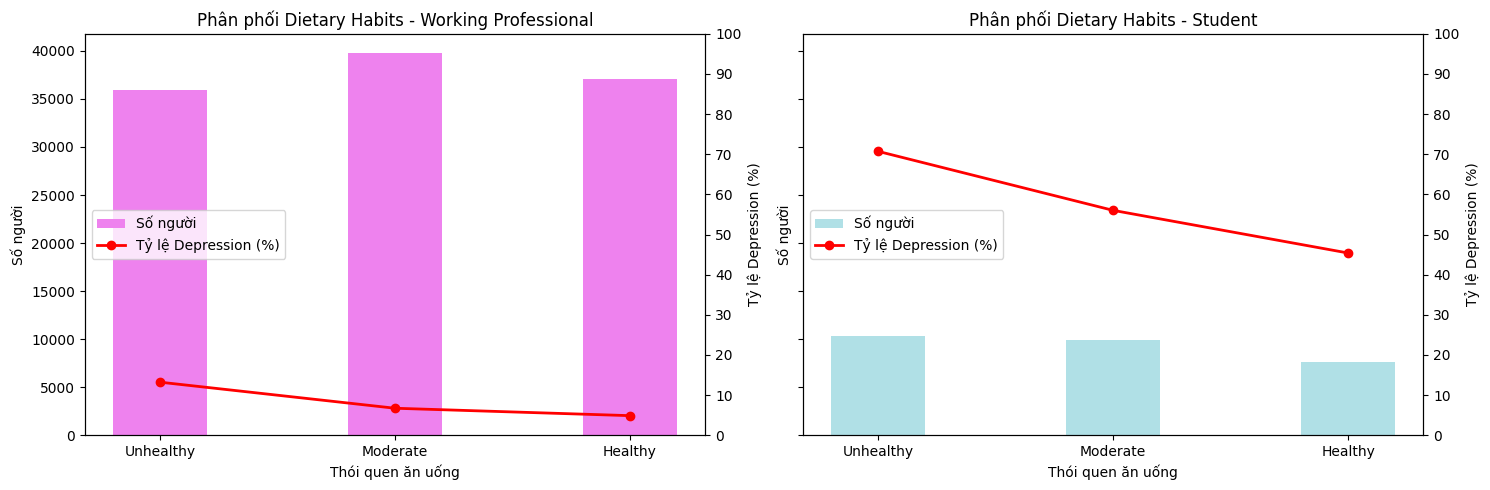

In [28]:
# Phân phối Dietary Habits và tỷ lệ Depression
_, ax1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

for i, d in enumerate([df_working, df_student]):
    # Tính số lượng và tỷ lệ depression
    dietary_stats = (
        d.groupby('Dietary Habits')[target]
        .agg(['count', 'mean'])
        .reset_index()
        .sort_values('Dietary Habits')
    )
    dietary_stats[target] = dietary_stats['mean'] * 100

    # Bar plot - phân phối Dietary Habits
    ax1[i].bar(
        dietary_stats['Dietary Habits'],
        dietary_stats['count'],
        width=0.4,
        color='violet' if d is df_working else 'powderblue',
        align='center',
        label='Số người'
    )
    ax1[i].set_xticks([0, 1, 2], ['Unhealthy', 'Moderate', 'Healthy'])
    ax1[i].set_ylabel('Số người')
    ax1[i].set_xlabel('Thói quen ăn uống')
    ax1[i].set_title('Phân phối Dietary Habits - ' + ('Working Professional' if d is df_working else 'Student'))

    # Line plot - tỷ lệ Depression
    ax2 = ax1[i].twinx()
    ax2.plot(
        dietary_stats['Dietary Habits'],
        dietary_stats[target],
        color='red',
        marker='o',
        linewidth=2,
        label='Tỷ lệ Depression (%)'
    )
    ax2.set_ylabel('Tỷ lệ Depression (%)')

    # Đặt yticks từ 0 đến 100
    ax2.set_ylim(0, 100)
    ax2.set_yticks(np.arange(0, 101, 10))

    # Kết hợp chú thích
    lines, labels = ax1[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1[i].legend()
    ax1[i].legend(lines + lines2, labels + labels2, loc='center left')

plt.tight_layout()
plt.show()

### Phân tích Dietary Habits

**1. Working Professional**
- Tỷ lệ trầm cảm giảm dần khi chất lượng dinh dưỡng cải thiện.
    - Unhealthy: ~15%
    - Moderate: ~8%
    - Healthy: ~5%

**2. Student**
- Nhóm Unhealthy chiếm số lượng lớn nhất.
- Tỷ lệ trầm cảm cao ở mọi nhóm (45-70%):
    - Unhealthy: Cao nhất (~70%).
    - Healthy: Thấp nhất nhưng vẫn cao hơn nhiều so với Working Professional (~45%).

**3. So sánh**
- Dữ liệu phân bố tương đối đều giữa ba nhóm (Unhealthy, Moderate, Healthy).
- Cả hai nhóm Working Professional và Student đều thể hiện xu hướng: **Dinh dưỡng kém $\rarr$ Trầm cảm cao hơn**.
- Tỷ lệ trầm cảm của Student giảm mạnh hơn so với Working Professional.

$\rarr$ Dinh dưỡng có tác động mạnh hơn đến Student so với Working Professional.

## Sleep Duration

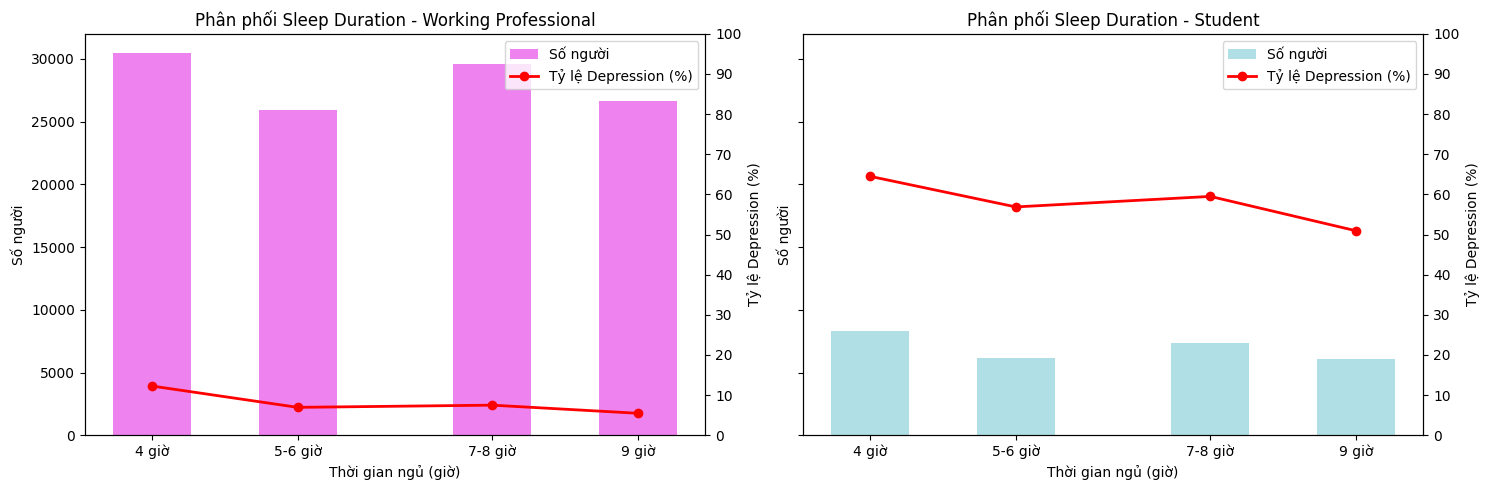

In [29]:
# Phân phối Sleep Duration và tỷ lệ Depression
_, ax1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

for i, d in enumerate([df_working, df_student]):
    # Tính số lượng và tỷ lệ depression
    sleep_stats = (
        d.groupby('Sleep Duration')[target]
        .agg(['count', 'mean'])
        .reset_index()
        .sort_values('Sleep Duration')
    )
    sleep_stats[target] = sleep_stats['mean'] * 100

    # Bar plot - phân phối Sleep Duration
    ax1[i].bar(
        sleep_stats['Sleep Duration'],
        sleep_stats['count'],
        color='violet' if d is df_working else 'powderblue',
        align='center',
        label='Số người'
    )
    ax1[i].set_xticks([4, 5.5, 7.5, 9], ['4 giờ', '5-6 giờ', '7-8 giờ', '9 giờ'])
    ax1[i].set_ylabel('Số người')
    ax1[i].set_xlabel('Thời gian ngủ (giờ)')
    ax1[i].set_title('Phân phối Sleep Duration - ' + ('Working Professional' if d is df_working else 'Student'))

    # Line plot - tỷ lệ trầm cảm
    ax2 = ax1[i].twinx()
    ax2.plot(
        sleep_stats['Sleep Duration'],
        sleep_stats[target],
        color='red',
        marker='o',
        linewidth=2,
        label='Tỷ lệ Depression (%)'
    )
    ax2.set_ylabel('Tỷ lệ Depression (%)')

    # Set yticks from 0 to 100
    ax2.set_ylim(0, 100)
    ax2.set_yticks(np.arange(0, 101, 10))

    # Combine legends neatly
    lines, labels = ax1[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1[i].legend(lines + lines2, labels + labels2)

plt.tight_layout()
plt.show()

### Phân tích Sleep Duration

**1. Working Professional**
- Tỷ lệ trầm cảm rất thấp ở mọi nhóm thời lượng ngủ (dưới 15%).
- Ít biến động giữa các nhóm ngủ khác nhau.

**2. Student**
- Tỷ lệ trầm cảm cao ở mọi mức (50-65%), vượt xa Working Professional.
- **Xu hướng**: Giảm nhẹ khi ngủ nhiều hơn.
    - 4 giờ: ~65% (cao nhất)
    - 9 giờ: ~50% (thấp nhất)

**3. So sánh**
- Phần lớn cả hai nhóm ngủ 4 giờ hoặc 7-8 giờ.
- Khoảng cách giữa hai nhóm rất lớn: ngay cả Student ngủ đủ (9 giờ) vẫn có tỷ lệ trầm cảm cao hơn gấp **5 lần** Working Professional thiếu ngủ nhất.

$\rarr$ Ngủ đủ giấc giúp giảm nguy cơ trầm cảm nhưng có tác động khá nhỏ.

## Ma trận tương quan

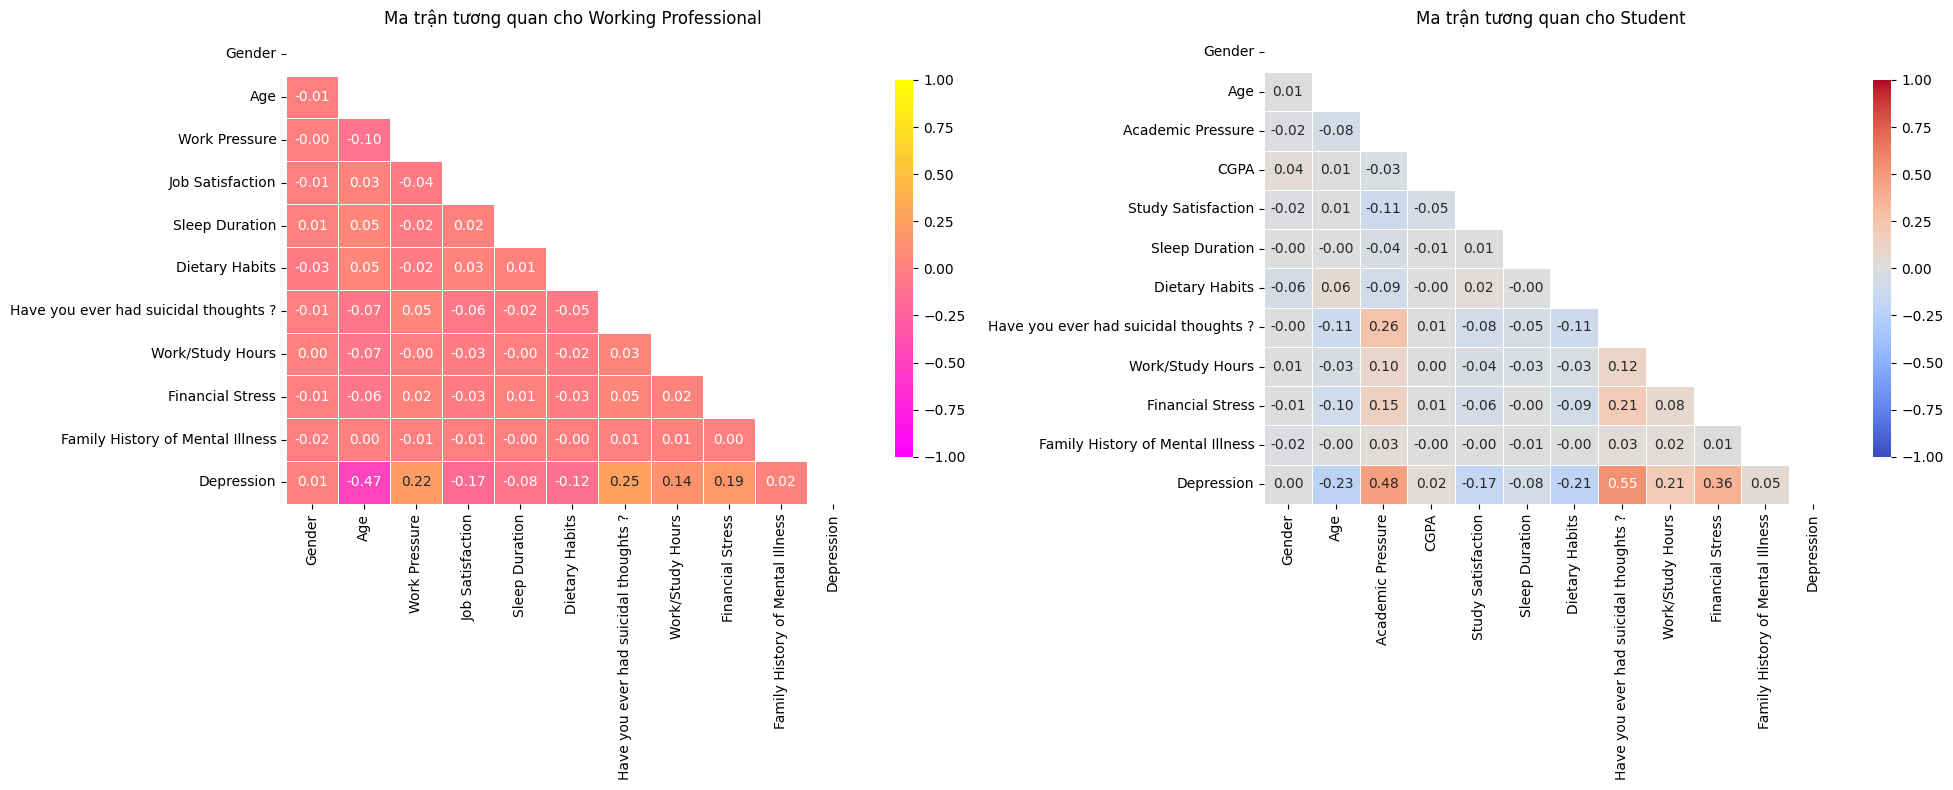

In [30]:
_, axes = plt.subplots(1, 2,figsize=(20, 8))

# Ma trận tương quan cho Working Professional
cols_for_corr_working = ['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',  
                         'Work/Study Hours', 'Financial Stress',  'Family History of Mental Illness',  'Depression']
corr_working = df_working[cols_for_corr_working].corr()

mask = np.triu(np.ones_like(corr_working, dtype=bool))
sns.heatmap(corr_working, annot=True, mask=mask, fmt='.2f', cmap='spring', vmin=-1, vmax=1, linewidths=.5, cbar_kws={'shrink': .8}, ax=axes[0])
axes[0].set_title('Ma trận tương quan cho Working Professional')


# Ma trận tương quan cho Student
cols_for_corr_student = ['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',  
                         'Work/Study Hours', 'Financial Stress',  'Family History of Mental Illness',  'Depression']
corr_student = df_student[cols_for_corr_student].corr()

mask = np.triu(np.ones_like(corr_student, dtype=bool))
sns.heatmap(corr_student, annot=True, mask=mask, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, cbar_kws={'shrink': .8}, ax=axes[1])
axes[1].set_title('Ma trận tương quan cho Student')


plt.tight_layout()
plt.show()

### Phân tích Ma trận

**1. Working Professional**
- **Age (-0.47)**: Yếu tố dự báo mạnh nhất - tuổi cao hơn gắn với nguy cơ trầm cảm thấp hơn đáng kể.
- **Suicidal Thoughts (0.25)** và **Work Pressure (0.22)**: Tương quan dương mức trung bình.
- **Financial Stress (0.19)**, **Job Satisfaction (-0.17)**, **Dietary Habits (-0.12)**, **Work/Study Hours (0.14)**: Tương quan yếu, có ít ảnh hưởng đến tỷ lệ trầm cảm.

**2. Student**
- **Suicidal Thoughts (0.55)**: Yếu tố dự báo mạnh nhất, Student có suy nghĩ tự tử có xu hướng bị trầm cảm.
- **Academic Pressure (0.48)** và **Financial Stress (0.36)**: Tương quan dương khá mạnh, là yếu tố quan trọng.
- **Age (-0.23)**, **Dietary Habits (-0.21)**, **Work/Study Hours (0.21)**: Tương quan mức trung bình.
- **Study Satisfaction (-0.17)**: Tác động yếu.
- **CGPA (0.05)**: Gần như không có mối liên hệ.

**3. So sánh**
- **Suicidal Thoughts**, **Financial Stress** và **Pressure**: Có tác động gấp đôi ở Student (0.55 vs 0.25; 0.36 vs 0.19; 0.48 vs 0.22).
- **Dietary Habits**: Ảnh hưởng mạnh hơn ở Student (-0.21 vs -0.12) so với Working Professional.
- **Gender**, **Sleep Duration**, **Family History**: Tương quan yếu hoặc không đáng kể ở cả hai nhóm.

# Tiền xử lý dữ liệu

In [31]:
# Xử lý dữ liệu train
df_train['Gender'] = df_train['Gender'].map(gender)
df_train['Working Professional or Student'] = df_train['Working Professional or Student'].map(work)
df_train['Have you ever had suicidal thoughts ?'] = df_train['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
df_train['Family History of Mental Illness'] = df_train['Family History of Mental Illness'].map(family_history)
df_train['Sleep Duration'] = df_train['Sleep Duration'].map(sleep)
df_train['Dietary Habits'] = df_train['Dietary Habits'].map(diet)

# Xử lý dữ liệu test
df_test['Gender'] = df_test['Gender'].map(gender)
df_test['Working Professional or Student'] = df_test['Working Professional or Student'].map(work)
df_test['Have you ever had suicidal thoughts ?'] = df_test['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
df_test['Family History of Mental Illness'] = df_test['Family History of Mental Illness'].map(family_history)
df_test['Sleep Duration'] = df_test['Sleep Duration'].map(sleep)
df_test['Dietary Habits'] = df_test['Dietary Habits'].map(diet)

In [32]:
# Gán Academic Pressure = 0 nếu là Working Professional và giá trị bị thiếu
# Xử lý dữ liệu train
df_train['Academic Pressure'] = np.where(
    (df_train['Working Professional or Student'] == 1) & (df_train['Academic Pressure'].isna()),
    0,
    df_train['Academic Pressure']
)
# Xử lý dữ liệu test
df_test['Academic Pressure'] = np.where(
    (df_test['Working Professional or Student'] == 1) & (df_test['Academic Pressure'].isna()),
    0,
    df_test['Academic Pressure']
)


# Gán Work Pressure = 0 nếu là Student và giá trị bị thiếu
# Xử lý dữ liệu train
df_train['Work Pressure'] = np.where(
    (df_train['Working Professional or Student'] == 0) & (df_train['Work Pressure'].isna()),
    0,
    df_train['Work Pressure']
)
# Xử lý dữ liệu test
df_test['Work Pressure'] = np.where(
    (df_test['Working Professional or Student'] == 0) & (df_test['Work Pressure'].isna()),
    0,
    df_test['Work Pressure']
)

In [33]:
# Gán Study Satisfaction = 0 nếu là Working Professional và giá trị bị thiếu
# Xử lý dữ liệu train
df_train['Study Satisfaction'] = np.where(
    (df_train['Working Professional or Student'] == 1) & (df_train['Study Satisfaction'].isna()),
    0,
    df_train['Study Satisfaction']
)
# Xử lý dữ liệu test
df_test['Study Satisfaction'] = np.where(
    (df_test['Working Professional or Student'] == 1) & (df_test['Study Satisfaction'].isna()),
    0,
    df_test['Study Satisfaction']
)



# Gán Job Satisfaction = 0 nếu là Student và giá trị bị thiếu
# Xử lý dữ liệu train
df_train['Job Satisfaction'] = np.where(
    (df_train['Working Professional or Student'] == 0) & (df_train['Job Satisfaction'].isna()),
    0,
    df_train['Job Satisfaction']
)
# Xử lý dữ liệu test
df_test['Job Satisfaction'] = np.where(
    (df_test['Working Professional or Student'] == 0) & (df_test['Job Satisfaction'].isna()),
    0,
    df_test['Job Satisfaction']
)

In [34]:
# Xử lí dữ liệu bị thiếu còn lại
categorical_cols = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Financial Stress']
numeric_cols = ['Age', 'CGPA', 'Work/Study Hours']

# Dùng trung vị để điền vào các cột số
for col in numeric_cols:
    med=df_train[col].median()
    df_train = df_train.fillna({col:med}) # Điền cho train
    df_test = df_test.fillna({col:med}) # Điền cho test

# Dùng mode để điền vào các cột thứ bậc
for col in categorical_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0]) # Điền cho train
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0]) # Điền cho test

# Dùng 'missing' để điền vào các giá trị còn lại
df_train = df_train.fillna(value='missing') # Điền cho train
df_test = df_test.fillna(value='missing') # Điền cho test

In [35]:
df_train.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [36]:
df_test.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64